In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data collection and processing

In [47]:
loan_df=pd.read_csv('loan_data.csv')
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [48]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [49]:
loan_df.shape

(381, 13)

In [50]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [51]:
loan_df.isnull().sum()

,0
Loan_ID,0
Gender,5
Married,0
Dependents,8
Education,0
Self_Employed,21
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,11


In [52]:
loan_df['Gender'].value_counts()

,count
Gender,
Male,291
Female,85


In [53]:
loan_df['Dependents'].value_counts()

,count
Dependents,
0,234
2,59
1,52
3+,28


In [54]:
loan_df['Self_Employed'].value_counts()

,count
Self_Employed,
No,325
Yes,35


In [55]:
loan_df['Loan_Amount_Term'].median()

360.0

In [56]:
loan_df['Credit_History'].value_counts()


,count
Credit_History,
1.0,294
0.0,57


In [57]:
#let's deal wuth missing data or we can just dropping it
loan_df['Gender'].fillna('Male',inplace=True)
loan_df['Dependents'].fillna(0,inplace=True)
loan_df['Self_Employed'].fillna('No',inplace=True)
loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].median,inplace=True)
loan_df['Credit_History'].fillna(1.0,inplace=True)


/tmp/ipython-input-2125127835.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_df['Gender'].fillna('Male',inplace=True)
/tmp/ipython-input-2125127835.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [58]:
loan_df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [59]:
#label encoding
loan_df.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

/tmp/ipython-input-905795319.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_df.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)


In [60]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1


In [61]:
#replacing the value of 3+ in Dependents to 4
loan_df=loan_df.replace(to_replace='3+',value=4)

In [62]:
loan_df['Dependents'].value_counts()

,count
Dependents,
0,234
2,59
1,52
4,28
0,8


<Axes: xlabel='Education', ylabel='count'>

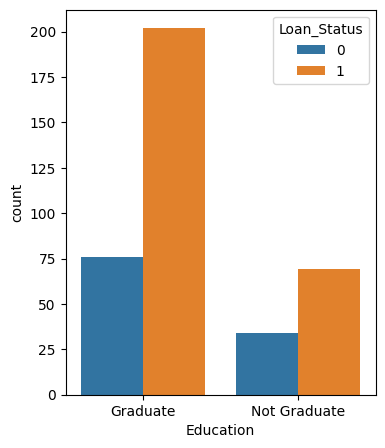

In [63]:
#education & loan Status
plt.figure(figsize=(4,5))
sns.countplot(x='Education',hue='Loan_Status',data=loan_df)

in most of the cases the graduate applicants get a loan

<Axes: xlabel='Married', ylabel='count'>

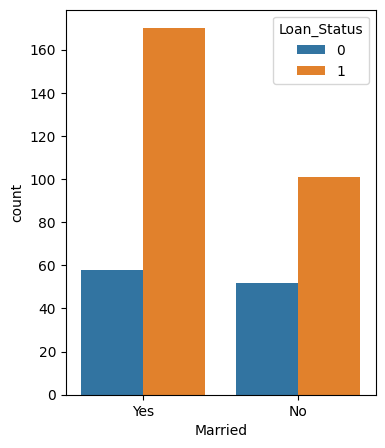

In [64]:
#marital status & loan status
plt.figure(figsize=(4,5))
sns.countplot(x='Married',hue='Loan_Status',data=loan_df)

if a person is married there is high chance that their loan will be approved

<Axes: xlabel='Gender', ylabel='count'>

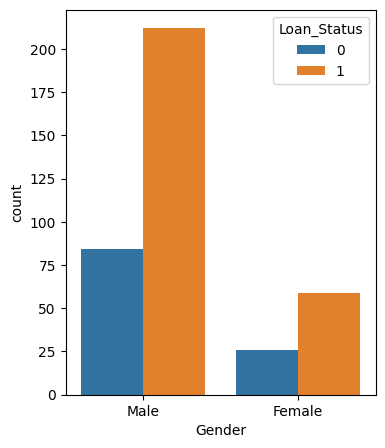

In [65]:
#gender & loan status
plt.figure(figsize=(4,5))
sns.countplot(x='Gender',hue='Loan_Status',data=loan_df)

<Axes: xlabel='Self_Employed', ylabel='count'>

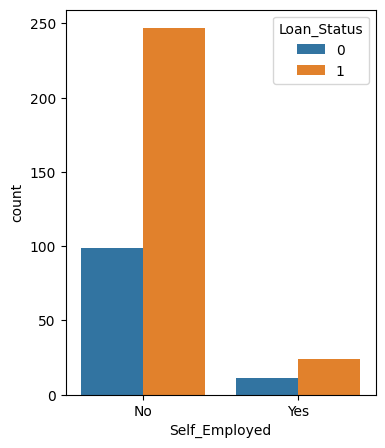

In [66]:
#Self_Employed status & loan status
plt.figure(figsize=(4,5))
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_df)

<Axes: xlabel='Credit_History', ylabel='count'>

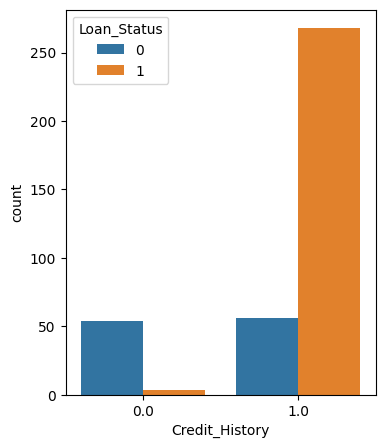

In [67]:
#Credit_History & loan status
plt.figure(figsize=(4,5))
sns.countplot(x='Credit_History',hue='Loan_Status',data=loan_df)

In [68]:
#convert categorical columns to numerical values
loan_df.replace({'Married':{'Yes':0,'No':1},'Gender':{'Male':0,'Female' :1},'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)

/tmp/ipython-input-3550053228.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_df.replace({'Married':{'Yes':0,'No':1},'Gender':{'Male':0,'Female' :1},'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)


In [69]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,0,0,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,0,0,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,0,0,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,0,1,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,0,0,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1


In [70]:
#saperating the data and label
X=loan_df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=loan_df['Loan_Status']

In [71]:
print(X,X.shape)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         0        0          1          1              0             4583   
1         0        0          0          1              1             3000   
2         0        0          0          0              0             2583   
3         0        1          0          1              0             6000   
4         0        0          0          0              0             2333   
..      ...      ...        ...        ...            ...              ...   
376       0        0          4          1              0             5703   
377       0        0          0          1              0             3232   
378       1        1          0          1              0             2900   
379       0        0          4          1              0             4106   
380       1        1          0          1              1             4583   

     CoapplicantIncome  LoanAmount Loan_Amount_Term  Credit_His

In [72]:
print(Y,Y.shape)

0      0
1      1
2      1
3      1
4      1
      ..
376    1
377    1
378    1
379    1
380    0
Name: Loan_Status, Length: 381, dtype: int64 (381,)


In [73]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [81]:
print(X_train['Dependents'].unique()[:10])
print(X_train['Dependents'].dtype)


['1' '0' '2' 0 4]
object


In [82]:
X_train['Dependents'] = pd.to_numeric(X_train['Dependents'], errors='coerce')
X_train['Loan_Amount_Term'] = pd.to_numeric(X_train['Loan_Amount_Term'], errors='coerce')

X_test['Dependents'] = pd.to_numeric(X_test['Dependents'], errors='coerce')
X_test['Loan_Amount_Term'] = pd.to_numeric(X_test['Loan_Amount_Term'], errors='coerce')


In [86]:
print(X_train.head())
print(X_train.dtypes)
print(X_test.isnull().sum())

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
154       0        0           1          0              0             6608   
126       0        1           0          1              0             2479   
178       0        1           0          1              0             3158   
7         0        1           0          1              0             1853   
218       0        0           2          0              0             3083   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
154                0.0       137.0             180.0             1.0   
126                0.0        59.0             360.0             1.0   
178             3053.0        89.0             360.0             1.0   
7               2840.0       114.0             360.0             1.0   
218             2168.0       126.0             360.0             1.0   

     Property_Area  
154              2  
126              2  
178              0  
7       

In [87]:
X_train['Loan_Amount_Term'].fillna(X_train['Loan_Amount_Term'].median(), inplace=True)
X_test['Loan_Amount_Term'].fillna(X_test['Loan_Amount_Term'].median(), inplace=True)

/tmp/ipython-input-1180367367.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Loan_Amount_Term'].fillna(X_train['Loan_Amount_Term'].median(), inplace=True)
/tmp/ipython-input-1180367367.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

In [88]:
X_train.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [74]:
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(342, 11) (39, 11)
(342,) (39,)


Training the model

In [89]:
classifier=svm.SVC(kernel='linear')

In [90]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [91]:
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print('Acuuracy on training data',training_data_accuracy)

Acuuracy of training data 0.8391812865497076


In [92]:
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Acuuracy on test data',test_data_accuracy)

Acuuracy on test data 0.8205128205128205


In [95]:
y_pred=classifier.predict(X_test)

In [96]:
print(y_pred)
print(Y_test)

[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 1]
340    1
72     0
341    0
43     0
73     1
186    1
71     1
28     1
306    1
107    1
167    1
346    1
112    1
129    1
133    1
275    1
374    1
301    0
51     1
302    1
235    1
310    1
257    1
103    1
81     1
153    1
140    0
68     1
113    0
87     1
203    1
282    1
183    0
326    1
157    0
19     0
269    0
331    1
284    0
Name: Loan_Status, dtype: int64
